In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.python.framework import ops
import tf_utils
import time

%matplotlib inline
np.random.seed(1)

用新版的tensorflow带的包写的，其中发现的问题就是learning_rate要设置小一点，步子太大会导致每次反向传递参数越来越离谱  
把数据/255很重要

In [119]:
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = tf_utils.load_dataset()

In [120]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1) #每一列就是一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1)

#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

#转换为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6).T
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6).T

In [121]:
print("X_train_orig.shape:",X_train_orig.shape)
print("Y_train_orig.shape:",Y_train_orig.shape)
print("X_train.shape:",X_train.shape)
print("Y_train.shape:",Y_train.shape)

X_train_orig.shape: (1080, 64, 64, 3)
Y_train_orig.shape: (1, 1080)
X_train.shape: (1080, 12288)
Y_train.shape: (1080, 6)


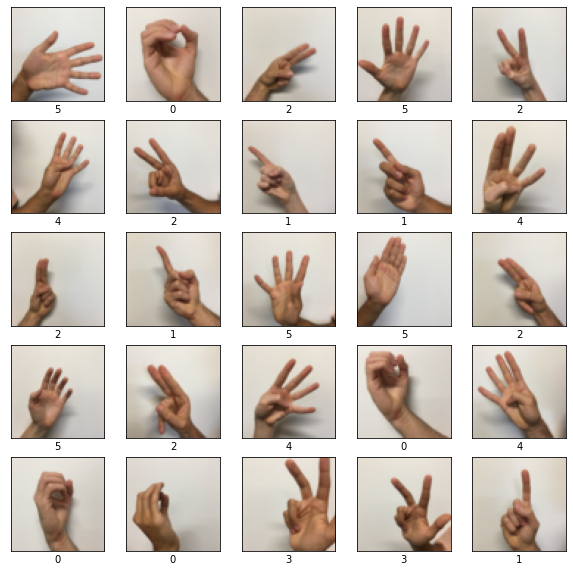

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(classes[Y_train_orig[0,i]])
plt.show()

In [251]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Softmax()
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])


In [252]:
history = model.fit(X_train_orig/255., Y_train_orig[0], epochs=1500,batch_size = 32,validation_data=(X_test_orig/255.,Y_test_orig[0]),verbose = 0)
hisdf = pd.DataFrame(history.history)

In [253]:
hisdf.iloc[-1,:]

loss            0.026544
accuracy        0.998148
val_loss        0.682230
val_accuracy    0.833333
Name: 1499, dtype: float64

<AxesSubplot:>

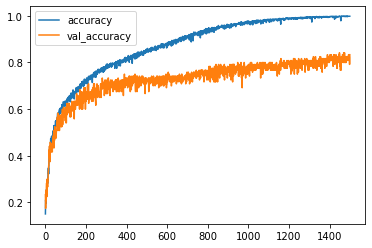

In [254]:
hisdf[["accuracy","val_accuracy"]].plot()

In [321]:
# Y one_hot
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Softmax()
])

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.000087)

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [322]:
history = model.fit(X_train, Y_train, epochs=1500,batch_size = 32,validation_data=(X_test,Y_test),verbose = 0)
hisdf = pd.DataFrame(history.history)

In [323]:
hisdf.iloc[-1,:]

loss            0.052849
accuracy        0.995370
val_loss        1.153874
val_accuracy    0.716667
Name: 1499, dtype: float64

<AxesSubplot:>

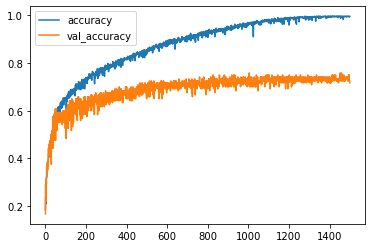

In [324]:
hisdf[["accuracy","val_accuracy"]].plot()